<a href="https://colab.research.google.com/github/veiro/tesis-imputacion-datos/blob/main/codigo/pruebas_unitarias/Test_of_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
USAR_GOOGLE_DRIVE =  True
MODO_DESARROLLO = False



# imports

In [ ]:
!pip install "pandas<2.0.0"

In [ ]:
import os
import sys

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
import pandas
from sklearn.model_selection import train_test_split
from datetime import datetime

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import time
from tqdm import tqdm
from google.colab import drive
import pickle

if (USAR_GOOGLE_DRIVE):
  drive.mount('/content/gdrive')
  PATH_DATA_PROCESADA = "/content/gdrive/MyDrive/Maestria/Tesis/Codigo/data/data-procesada"
  sys.path.append('/content/gdrive/MyDrive/Maestria/Tesis/Codigo/utils')

else:
  PATH_DATA_PROCESADA = "/mnt"

import utils as utils
import importlib
importlib.reload(utils)

if (28 ==  utils.version()):
  print("version correcta")
else:
  raise Exception("Version de Util vieja")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
version correcta


# RMSE

In [ ]:
## error en el primer elemento y segundo elemento pero sin mascara
a = np.array([[1,2,3,4,5,6], [1,2,3,4,5,6]])
b = np.array([[2,2,3,4,5,6], [1,2,3,4,5,6]])
m = np.array([[0,0,0,0,0,0], [0,0,0,0,0,0]])
print(utils.rmse(a, b, m) )
assert utils.rmse(a, b, m) == 0

## error en el primer elemento y segundo elemento pero sin mascara
a = np.array([[1,2,3,4,5,6], [1,2,3,4,5,6]])
b = np.array([[2,2,3,4,5,6], [1,2,3,4,5,6]])
m = np.array([[1,0,0,0,0,0], [0,0,0,0,0,0]])
            # = (2 - 1 ) , 0 , 0, 0, 0, 0
            # = 0 , 0 , 0, 0, 0, 0
            #1, 0 , 0, 0, 0, 0
         # + 0, 0, 0, 0, 0
            #1/12 =
            #sqrt(1/12) = 0.28

print("Se espera 0.28, se obtiene ", utils.rmse(a, b, m) )
assert utils.rmse(a, b, m) != 1

## error en el primer elemento y segundo elemento
a = np.array([[1,1,3,4,5,6], [1,2,3,4,5,6]])
b = np.array([[2,2,3,4,5,6], [2,2,3,4,5,6]])
m = np.array([[1,0,0,0,0,0], [1,0,0,0,0,0]])
            # = (2 - 1 ) , 0 , 0, 0, 0, 0
            # = (2 - 1 ) , 0 , 0, 0, 0, 0
            #1, 0 , 0, 0, 0, 0
            #1, 0 , 0, 0, 0, 0
            #2/10 = 1/5 = 0.20
            #sqrt(0.2) = 0.4


print("Se espera 0.4, se obtiene ", utils.rmse(a, b, m))
assert utils.rmse(a, b, m) > 0


0.0
Se espera 0.28, se obtiene  0.28867513459481287
Se espera 0.4, se obtiene  0.408248290463863


# Embbedings

## PCA analisis

In [ ]:
data_filepath = PATH_DATA_PROCESADA +'/csse_covid_19_data.csv'
data_full = pd.read_csv(data_filepath)
data_sin_columnas_completas = data_full.drop(['FIPS', 'Admin2', 'Recovered', 'Active', 'Combined_Key'], axis=1)
data_sin_null = data_sin_columnas_completas.dropna(subset=['Province_State', 'Lat', 'Long_', 'Incident_Rate', 'Case_Fatality_Ratio'])



In [ ]:
emb = utils.getEmbbeding(data_sin_null.head(100), PATH_DATA_PROCESADA)
emb = emb.drop(['Province_State', 'Country_Region', 'Last_Update', 'date'], axis=1)
emb = emb.drop(['cat_Country_Region_index','cat_Province_State_index','cat_Last_Update_index', 'cat_date_index'], axis=1)

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(emb)
pca_data_Df = pd.DataFrame(data = pca_data
             , columns = ['pca1', 'pca2'])


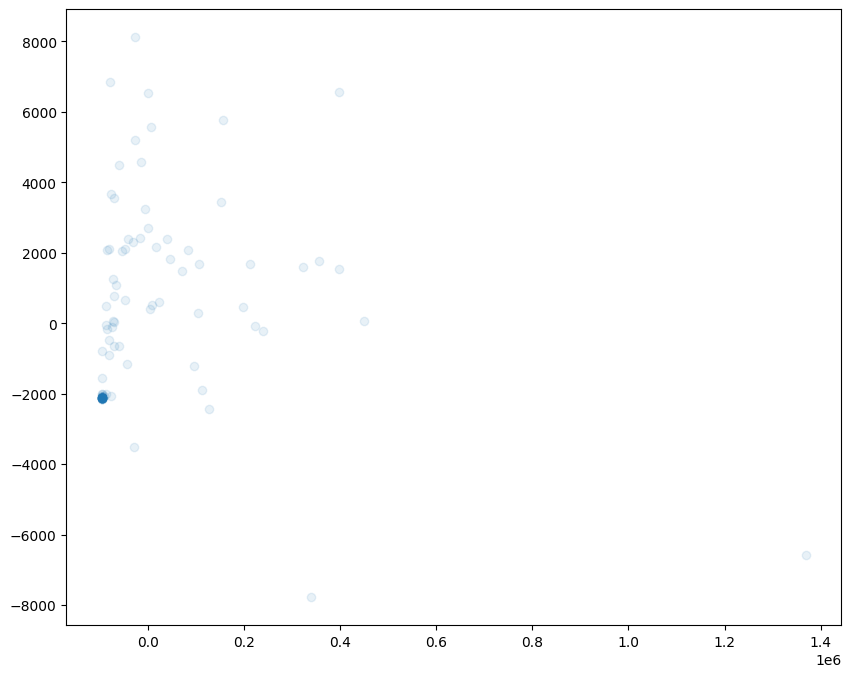

In [ ]:

FS = (10, 8)
fig, ax = plt.subplots(figsize=FS)
# Make points translucent so we can visually identify regions with a high density of overlapping points
ax.scatter(pca_data_Df.pca1, pca_data_Df.pca2, alpha=.1);


## prueba prediccion

In [ ]:
!pip install pycaret

In [ ]:
import os
import sys

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
import pandas
from sklearn.model_selection import train_test_split
from google.colab import drive
#from ydata_profiling import ProfileReport

from datetime import datetime


In [ ]:
# para hacer pruebas bajo la cantidad
train_data_decoded_open = pandas.read_csv(PATH_DATA_PROCESADA + '/csse_covid_19_data_train_decode=True_missing=False_' + 'Desarrollo=False' + '.csv')
test_data_decoded_open = pandas.read_csv(PATH_DATA_PROCESADA + '/csse_covid_19_data_test_decode=True_missing=False_' + 'Desarrollo=False' + '.csv')

from pycaret.regression import *

if(MODO_DESARROLLO):
  df_train = train_data_decoded_open.sample(n=10000, random_state=1)
  df_test = test_data_decoded_open.sample(n=10000, random_state=1)

else:
  df_train = train_data_decoded_open
  df_test = test_data_decoded_open


utils.mostrarDatos(df_train)
utils.mostrarDatos(df_test)

Nombre datos: 

--------------------------------------------------------------------------------

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Incident_Rate', 'Case_Fatality_Ratio', 'date'],
      dtype='object')

--------------------------------------------------------------------------------

SHAPE:

(2094556, 10)

--------------------------------------------------------------------------------

Count of NaN:

0

--------------------------------------------------------------------------------

Nombre datos: 

--------------------------------------------------------------------------------

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Incident_Rate', 'Case_Fatality_Ratio', 'date'],
      dtype='object')

--------------------------------------------------------------------------------

SHAPE:

(897667, 10)

-------------------------------------------------------------

In [ ]:
df_train =  utils.getEmbbeding(df_train, PATH_DATA_PROCESADA)
df_train = df_train.drop(['Province_State', 'Country_Region', 'Last_Update', 'date'], axis=1)
df_train = df_train.drop(['cat_Country_Region_index','cat_Province_State_index','cat_Last_Update_index', 'cat_date_index'], axis=1)

df_test =  utils.getEmbbeding(df_test, PATH_DATA_PROCESADA)
df_test = df_test.drop(['Province_State', 'Country_Region', 'Last_Update', 'date'], axis=1)
df_test = df_test.drop(['cat_Country_Region_index','cat_Province_State_index','cat_Last_Update_index', 'cat_date_index'], axis=1)

In [ ]:
%%time
s = setup(df_train, target = 'Deaths', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Deaths
2,Target type,Regression
3,Original data shape,"(2094556, 18)"
4,Transformed data shape,"(2094556, 18)"
5,Transformed train set shape,"(1466189, 18)"
6,Transformed test set shape,"(628367, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


CPU times: user 11.8 s, sys: 2.37 s, total: 14.2 s
Wall time: 15.6 s


In [ ]:
%%time
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:40:28
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.9774,6389.2129,54.4949,0.9998,0.0131,0.0027,160.8050
dt,Decision Tree Regressor,2.5862,15151.8142,83.2659,0.9995,0.0173,0.0028,2.5170
knn,K Neighbors Regressor,250.4054,3767817.4949,1940.0443,0.8724,0.7103,0.3696,134.0140
ridge,Ridge Regression,785.7186,8532558.7875,2920.5572,0.7115,2.4281,25.5532,0.1950
lr,Linear Regression,785.7206,8532558.7882,2920.5572,0.7115,2.4281,25.5533,0.7620
lar,Least Angle Regression,785.7206,8532558.7882,2920.5572,0.7115,2.4281,25.5533,0.2020
llar,Lasso Least Angle Regression,783.9522,8532771.0023,2920.5928,0.7115,2.4260,25.5349,0.2000
br,Bayesian Ridge,785.6985,8532558.8243,2920.5572,0.7115,2.4281,25.5526,0.3920
lasso,Lasso Regression,776.9086,8550486.7547,2923.6202,0.7109,2.4074,24.7394,9.6330
en,Elastic Net,759.7532,8685936.9000,2946.6862,0.7064,2.3522,20.6924,4.4330


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.8714,198.5123,12.4464,1.0000,0.0134,0.0021,80.4970
rf,Random Forest Regressor,1.9774,6389.2129,54.4949,0.9998,0.0131,0.0027,160.8050
dt,Decision Tree Regressor,2.5862,15151.8142,83.2659,0.9995,0.0173,0.0028,2.5170
xgboost,Extreme Gradient Boosting,28.8407,20870.0463,143.0984,0.9993,0.3638,0.1505,1.7360
lightgbm,Light Gradient Boosting Machine,47.9366,50303.7191,223.8877,0.9983,0.6605,0.5339,135.3820
gbr,Gradient Boosting Regressor,106.0739,128784.0113,358.8037,0.9956,1.1327,2.0583,48.4190
knn,K Neighbors Regressor,250.4054,3767817.4949,1940.0443,0.8724,0.7103,0.3696,134.0140
lr,Linear Regression,785.7206,8532558.7882,2920.5572,0.7115,2.4281,25.5533,0.7620
lar,Least Angle Regression,785.7206,8532558.7882,2920.5572,0.7115,2.4281,25.5533,0.2020
ridge,Ridge Regression,785.7186,8532558.7875,2920.5572,0.7115,2.4281,25.5532,0.1950


CPU times: user 14min 23s, sys: 18.7 s, total: 14min 42s
Wall time: 1h 42min 27s


In [ ]:
ruta_modelo = PATH_DATA_PROCESADA + '/modelo_prediccion/' + 'regresion_embbedings_deaths_Desarrollo='+str(MODO_DESARROLLO)
save_model(best, ruta_modelo)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Lat', 'Long_', 'Confirmed',
                                              'Incident_Rate',
                                              'Case_Fatality_Ratio',
                                              'cat_Country_Region_0',
                                              'cat_Country_Region_1',
                                              'cat_Country_Region_2',
                                              'cat_Province_State_0',
                                              'cat_Province_State_1',
                                              'cat_Province_State_2',
                                              'cat_date_0', 'cat_date_1',
                                              'cat_date_2', 'cat_Last_Update_0',
                                              'cat_Last_Update_1',
                                              'cat_Last_Update_2'],
    

In [ ]:
predictions = predict_model(best, data = df_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.8064,101.3967,10.0696,1.0000,0.0118,0.0019


Esto de abajo es lo que se obtenia con la codificacion orginal

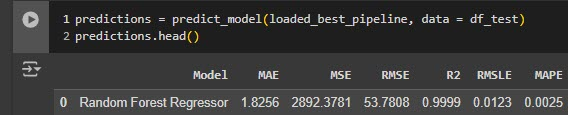




# Decode

In [ ]:

def testDecode():
  df_train_encoded, df_train_encoded_missing, mask_train_open = utils.obtenerDatosTrain(MODO_DESARROLLO, PATH_DATA_PROCESADA)
  decodedData = utils.decode(df_train_encoded, df_train_encoded, PATH_DATA_PROCESADA)


  train_data_decoded_open = pandas.read_csv(PATH_DATA_PROCESADA + '/csse_covid_19_data_train_decode=True_missing=False_' + 'Desarrollo=False' + '.csv')

  diff = decodedData.compare(train_data_decoded_open)

  print("Differences:")
  print(diff)

  assert diff.empty, "Los datos no son iguales"

#calls
testDecode()


# Similarridad del coseno

In [ ]:

# Caso donde la similitud del coseno promedio debería ser igual a 1
data1 = {'A': [1, 0], 'B': [0, 1]}
data2 = {'A': [1, 0], 'B': [0, 1]}
m = np.array([[1,1], [1,1]])

#    A B  A B
#cos(1 0, 1 0) = cos(0) = 1
#cos(0 1, 0 1) = cos(0) = 1
# 1+1/2 = 1
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

similitud_promedio = utils.calcular_similitud_cosine_promedio(df1, df2, m)
print("Se esperaba 1 y llego: ",similitud_promedio)
assert similitud_promedio == 1

# Caso donde la similitud del coseno promedio debería ser igual a -1
data1 = {'A': [1, 0], 'B': [0, 1]}
data2 = {'A': [-1, 0], 'B': [0, -1]}

#    A B  A B
#cos(1 0, -1  0) = cos(180) = - 1
#cos(0 1,  0 -1) = cos(180) = - 1
# -1-1/2 = -1
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

similitud_promedio = utils.calcular_similitud_cosine_promedio(df1, df2, m)
print("Se esperaba -1 y llego: ",similitud_promedio)
assert similitud_promedio == -1

# Caso donde la similitud del coseno promedio debería ser igual a 0

data1 = {'A': [1, 0], 'B': [0, 1]}
data2 = {'A': [0, -1], 'B': [-1, 0]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
#    A B  A B
#cos(1 0,  0 -1) = cos(270) = 0
#cos(0 1, -1  0) = cos(90) =  0
#  0 + 0/2 = 0

similitud_promedio = utils.calcular_similitud_cosine_promedio(df1, df2, m)
print("Se esperaba 0 y llego: ",similitud_promedio)
assert similitud_promedio == 0

Se esperaba 1 y llego:  1.0
Se esperaba -1 y llego:  -1.0
Se esperaba 0 y llego:  0.0


# obtener df imputado


In [ ]:

# Caso donde la similitud del coseno promedio debería ser igual a 1
data1 = {'A': [1, 0], 'B': [0, 1]}
data2 = {'A': [1, 0], 'B': [0, 1]}
m = np.array([[0,0],
              [0,0]])

#o= A B, i = A B
#   1 0,     1 0
#   0 1,     0 1
#


original = pd.DataFrame(data1)
imputed = pd.DataFrame(data2)

o, i = utils.obtener_df_imputados(original, imputed, m)
assert original.equals(o)
assert imputed.equals(i)



# Caso donde la similitud del coseno promedio debería ser igual a -1
data1 = {'A': [1, 1], 'B': [1, 1]}
data2 = {'A': [0, 0], 'B': [0, 0]}
m = np.array([[0,1],
              [1,0]])


#o= A B, i = A B
#1 1, *  1 0        0  0 * 0 1
#1 1,    0 1  +     0  0   1 0
# =
# A B
# 1 0
# 0 1
original = pd.DataFrame(data1)
imputed = pd.DataFrame(data2)

o, i = utils.obtener_df_imputados(original, imputed, m)
assert  pd.DataFrame({'A': [1, 0], 'B': [0,1]}).equals(i)

# Caso donde la similitud del coseno promedio debería ser igual a 0

data1 = {'A': [1, 0], 'B': [0, 1]}
data2 = {'A': [0, -1], 'B': [-1, 0]}
m = np.array([[0,1],
              [0,0]])

#o= A B, i = A B
#1 0, * 1 0       0 -1 * 0 1
#0 1,   1 1      -1  0   0 0

# 1 -1
# 0  1


original = pd.DataFrame(data1)
imputed = pd.DataFrame(data2)

o, i = utils.obtener_df_imputados(original, imputed, m)
assert  pd.DataFrame({'A': [1, 0], 'B': [-1 ,1]}).equals(i)